Projeto de Ciencia de Dados - Previsão de Vendas

Projeto desenvolvido com o objetivo de prever as vendas baseado-se no investimento em propagandas por meio de comunicação.

In [60]:
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install sklearn

In [61]:
import pandas as pd
import openpyxl
import numpy

tabela = pd.read_csv("advertising.csv")

display(tabela)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


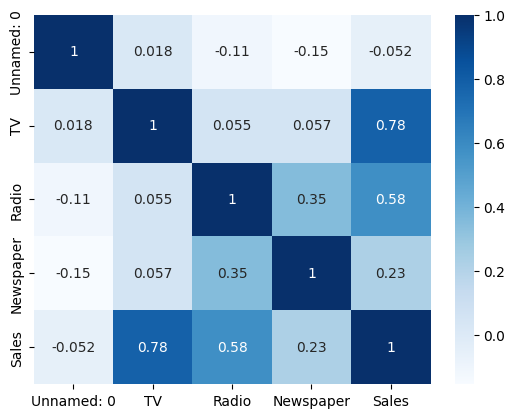

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(tabela.corr(), cmap ="Blues", annot=True)

plt.show()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


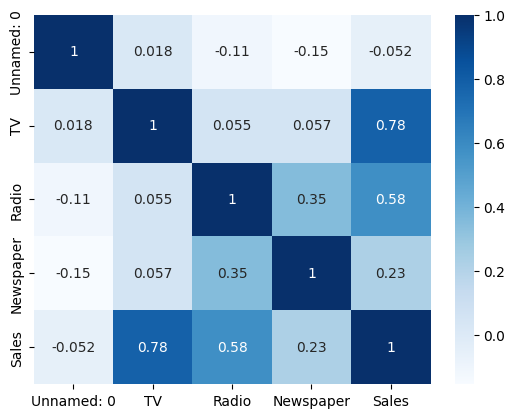

In [63]:
tabela = tabela.drop(columns=[])

display(tabela)

sns.heatmap(tabela.corr(), cmap ="Blues", annot=True)

plt.show()

In [64]:
y= tabela["Sales"]
x= tabela[["TV", "Newspaper", "Radio"]]

import sklearn

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_train, y_train)
modelo_arvoredecisao.fit(x_train, y_train)

RandomForestRegressor()

In [66]:
#Previsões

previsao_regressaolinear = modelo_regressaolinear.predict(x_test)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_test)

from sklearn.metrics import r2_score

print(r2_score(y_test, previsao_regressaolinear))
print(r2_score(y_test, previsao_arvoredecisao))

0.9118394152594567
0.9813343689491703


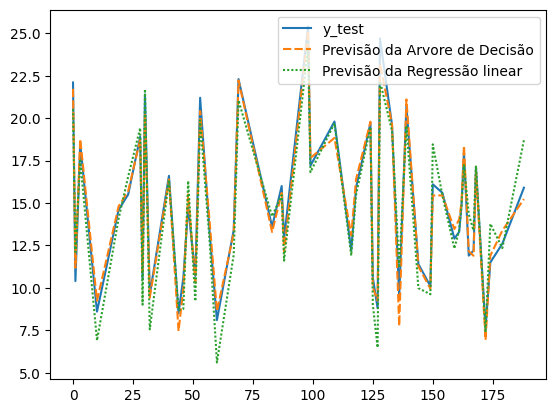

In [67]:
#Visualização gráfica

tabela_Auxiliar = pd.DataFrame()
tabela_Auxiliar["y_test"] = y_test
tabela_Auxiliar["Previsão da Arvore de Decisão"] = previsao_arvoredecisao
tabela_Auxiliar["Previsão da Regressão linear"] = previsao_regressaolinear

# display(tabela_Auxiliar)
sns.lineplot(data=tabela_Auxiliar)
plt.show()

In [80]:
#Fazer uma nova previsão
tabela2 = pd.read_csv("novos.csv")
tabela2 = tabela2.drop(columns=["Unnamed: 0"])

display(tabela2)

previsao = modelo_arvoredecisao.predict(tabela2)
print(previsao)

,TV,Newspaper,Radio
0,23.1,69.2,3.8
1,44.5,5.1,0.0
2,170.2,0.0,45.9


[ 7.459  8.561 19.77 ]
